# Мироненко А.
# Датасет GEOD-74737

## Trimmomatic

Для анализа был выбран образец SRR2927744. Прочтения в датасете парные. Результаты оценки исходных образцов содержатся в файлах [SRR2927744_1](results/SRR2927744_1_fastqc.html) и [SRR2927744_2](results/SRR2927744_2_fastqc.html). Для их предобработки был использован trimmomatic со следующими параметрами:
`java -jar trimmomatic-0.38.jar PE -phred33 ../SRR2927744_1.fastq.gz ../SRR2927744_2.fastq.gz output_forward_paired.fq.gz output_forward_unpaired.fq.gz output_reverse_paired.fq.gz output_reverse_unpaired.fq.gz ILLUMINACLIP:adapters/TruSeq3-PE.fa:2:30:10 LEADING:3 TRAILING:3 SLIDINGWINDOW:4:15 MINLEN:36`

Сведения о качестве получившихся образцов содержатся в файлах [SRR2927744_1_trimmed](results/SRR2927744_1__trimmed_fastqc.html) и [SRR2927744_2_trimmed](results/SRR2927744_2__trimmed_fastqc.html). В целом, качество прочтений после обработки улучшилось.

## DESeq2

Чтение данных и составление матрицы дизайна:

In [127]:
samples <- read.table('data/GSE74737_BreenMS_raw_and_normalized_counts - Raw Count Matrix.txt', 
                      header=TRUE,
                      skip=2,
                      sep=',')

sample_names = colnames(samples)[-1]
design = matrix(nrow=length(sample_names), ncol=2)


for (i in 1:11){
  design[i, 1] <- '0'
  design[i, 2] <- '0'
}


for (i in 11:21){
  design[i, 1] <- '0'
  design[i, 2] <- '1'
}

for (i in 21:30){
  design[i, 1] <- '1'
  design[i, 2] <- '1'
}

colnames(design) <- c('psychosis', 'addiction')
rownames(design) <- sample_names
design

,psychosis,addiction
CONTROL_1,0,0
CONTROL_2,0,0
CONTROL_3,0,0
CONTROL_4,0,0
CONTROL_5,0,0
CONTROL_6,0,0
CONTROL_7,0,0
CONTROL_8,0,0
CONTROL_9,0,0
CONTROL_10,0,0


In [36]:
samples

Gene,CONTROL_1,CONTROL_2,CONTROL_3,CONTROL_4,CONTROL_5,CONTROL_6,CONTROL_7,CONTROL_8,CONTROL_9,⋯,MAP_1,MAP_2,MAP_3,MAP_4,MAP_5,MAP_6,MAP_7,MAP_8,MAP_9,MAP_10
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1-мар.,1783,1117,2721,1466,1522,1218,781,886,910,⋯,1506,1016,1040,951,949,1495,1542,2321,1250,1509
2-мар.,1337,585,2773,526,466,1729,1529,1099,1134,⋯,1329,1489,1840,759,1404,1358,1622,800,1217,1405
3-мар.,204,126,106,69,37,85,77,88,109,⋯,106,125,141,57,65,134,103,67,69,91
4-мар.,0,0,1,1,1,1,2,0,0,⋯,0,0,1,0,0,0,2,1,0,0
5-мар.,404,279,655,373,363,266,205,231,249,⋯,351,220,254,279,268,334,329,455,309,254
6-мар.,3029,1583,3780,1926,1612,1449,1852,1947,2005,⋯,2271,2524,2698,2320,2365,2345,2852,2227,2696,1662
7-мар.,3938,3226,6846,4323,3609,2701,3059,2439,2689,⋯,4452,3448,3559,2694,3550,4532,4012,4526,3484,4083
8-мар.,15716,6557,14827,3121,2059,11586,10532,7847,12708,⋯,14716,24034,10250,4955,9912,9643,6611,7490,9304,6870
9-мар.,215,68,199,100,71,81,69,80,89,⋯,94,141,179,155,53,142,146,94,129,117


Как видно, названия первых генов считались некорректно (для других форматов ситуация аналогична), поэтому их нет смысла рассматривать.

In [37]:
samples_clean <- samples[27:nrow(samples),]

In [38]:
suppressMessages(library(DESeq2))

In [39]:
run_deseq <- function(samples, design) {
    dds <- DESeqDataSetFromMatrix(countData = samples[, -1],
                              colData = design,
                              design = ~psychosis + addiction)
    
    dds$psychosis <- relevel(as.factor(design$psychosis), ref='0')
    p_val <- 0.1
    
    #leave out hardly expressed genes
    keep <- rowSums(counts(dds)) >= 10
    dds <- dds[keep,]


    dds_fit <- DESeq(dds)
    plotMA(dds_fit, ylim=c(-2,2))
    res <- results(dds_fit)
    summary(res)
    res$gene = samples[keep,1]
    
    return(res)
}

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing
-- replacing outliers and refitting for 47 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)
estimating dispersions
fitting model and testing



out of 17802 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 19, 0.11%
LFC < 0 (down)     : 10, 0.056%
outliers [1]       : 0, 0%
low counts [2]     : 4832, 27%
(mean count < 13)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



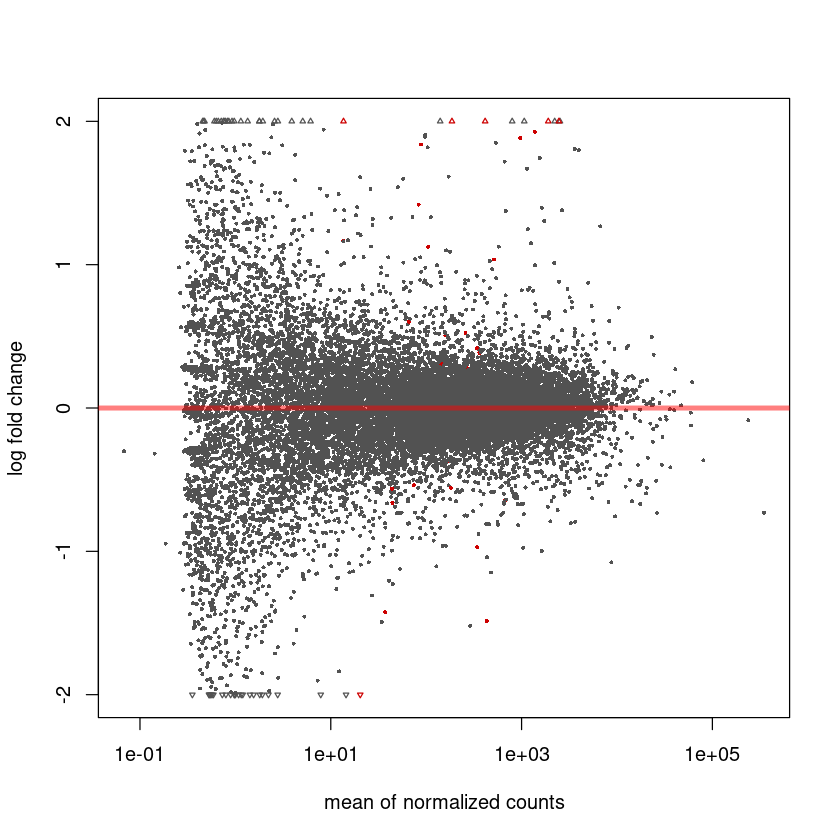

In [41]:
results <- run_deseq(samples_clean, data.frame(design))
results_filtered <- results[which(results$padj < 0.1),, drop=FALSE]

In [42]:
results_filtered$gene

[1] ADAM15       ALS2CR12     ANKRD36BP2   BAK1         BATF2       
 [6] C17orf76-AS1 CLN3         CTSL1        DDRGK1       EPSTI1      
[11] FAT1         FBP1         GBP1P1       IFI44L       ISG15       
[16] KBTBD6       LINC00482    MAGEE1       MAOA         MFSD7       
[21] OAS1         PHLDB2       RFESD        RSAD2        SIGLEC1     
[26] TBC1D2       TCN2         ZBP1         ZNF286B     
23345 Levels: 1-дек. 1-мар. 1-сент. 1/2-SBSRNA4 10-мар. 10-сент. ... ZZZ3

## DAVID

In [43]:
suppressMessages(library(RDAVIDWebService))

Загрузка результатов аннотировония сервисом DAVID.

In [128]:
david_results <-DAVIDFunctionalAnnotationTable("results/david_results.txt")
david_results

DAVID Result object
Result type:  Functional Annotation Table 
Genes: 25  with (unique: 25 , duplicate: 0 )
Available categories:  BIOCARTA, COG_ONTOLOGY, GAD_DISEASE, GAD_DISEASE_CLASS, GOTERM_BP_DIRECT, GOTERM_CC_DIRECT, GOTERM_MF_DIRECT, INTERPRO, KEGG_PATHWAY, OMIM_DISEASE, PIR_SUPERFAMILY, SMART, UP_KEYWORDS, UP_SEQ_FEATURE, UP_TISSUE 

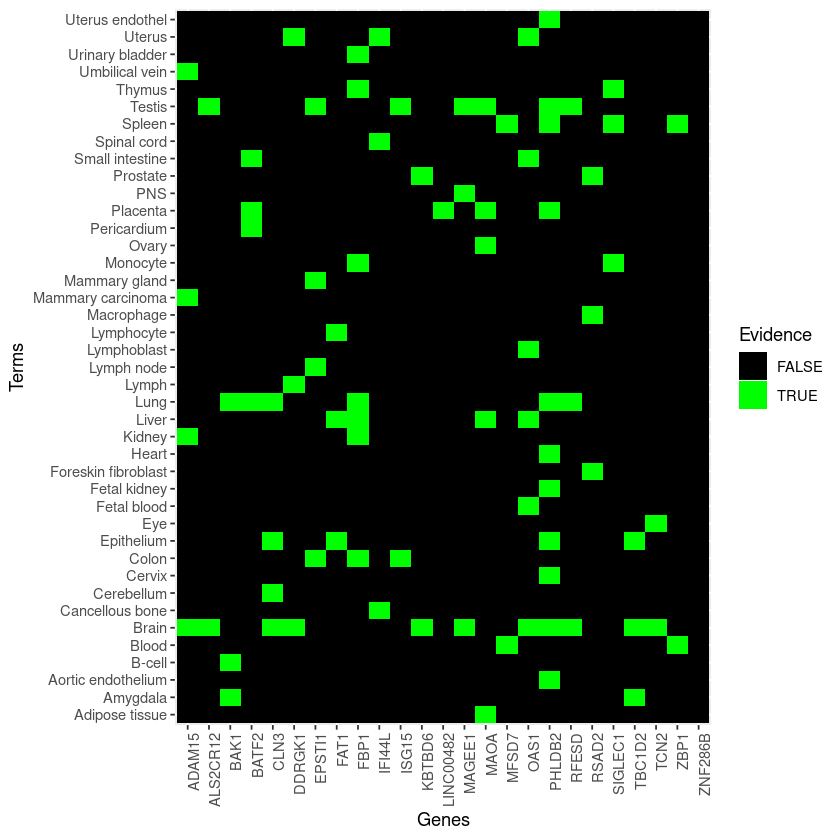

In [45]:
plot2D(david_results, category='UP_TISSUE')

Информация о том, с какими заболеваниями ассоциированы рассматриваемые гены

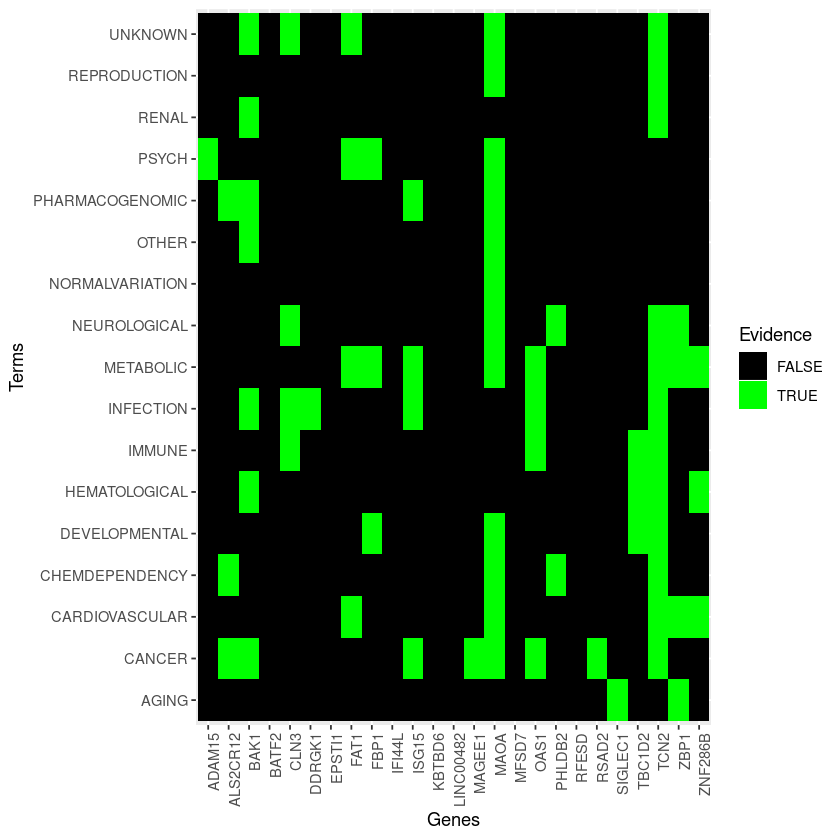

In [46]:
plot2D(david_results, category='GAD_DISEASE_CLASS')

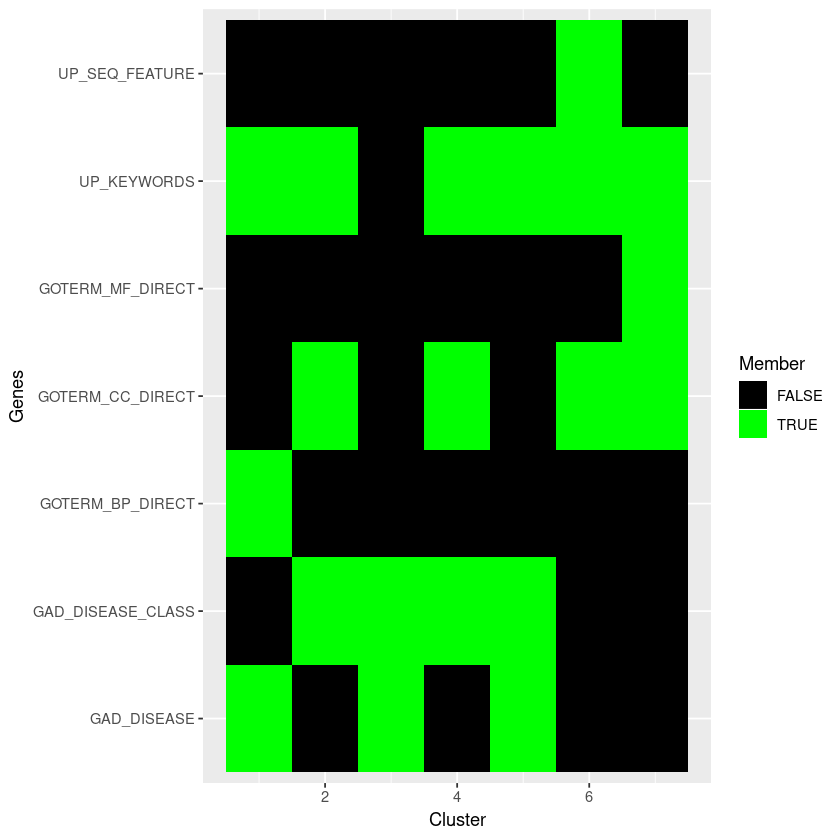

In [129]:
david_results <-DAVIDGeneCluster("results/david_cluster.txt")
plot2D(david_results)

## FGSEA

Подготовка данных для анализа:

In [49]:
suppressMessages(library(dplyr))
suppressMessages(library(tibble))

gene_stats <- data.frame(results) %>%
  dplyr::select(gene, stat) %>% 
  na.omit() %>% 
  distinct() %>% 
  group_by(gene)
ranks <- deframe(gene_stats)

In [50]:
suppressMessages(library(fgsea))

Hallmark пути:

In [120]:
pathway.hallmark <- gmtPathways('pathways/h.all.v6.2.symbols.gmt')

In [121]:
#fgseaRes <- lapply(pathways, function(p) fgsea(pathways=p, stats=ranks, nperm=1000))
fgseaRes <- fgsea(pathways=pathway.hallmark, stats=ranks, nperm=1000)
fgseaRes[fgseaRes$padj < 0.01]

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
HALLMARK_TNFA_SIGNALING_VIA_NFKB,0.001754386,0.008724481,0.4318764,2.073295,0,196,"CXCL11 , CCRL2 , ATF3 , KLF4 , ABCA1 , TNFAIP2, IFIH1 , SLC2A6 , IFIT2 , TRIB1 , IER2 , DDX58 , DUSP5 , CSF1 , SPSB1 , HBEGF , SIK1 , TAP1 , SAT1 , CEBPB , VEGFA , CD80 , RHOB , CD83 , NFKB1 , IL6 , ICAM1 , ZFP36 , STAT5A , GCH1 , TNF , FUT4 , CXCL3 , NR4A1 , DRAM1 , MAP3K8 , IRF1 , IL15RA , NFKBIE , RELB , FOSL1 , BHLHE40, PLEK , REL , IER5 , RELA , GADD45B, PHLDA2 , RIPK2 , NINJ1 , RNF19B , NFIL3 , EGR2 , ATP2B1 , PDLIM5 , IFNGR2 , DENND5A, CXCL10 , CDKN1A , B4GALT5, PPAP2B , LITAF , PLAUR , MYC , NFKB2 , CFLAR , SMAD3 , EDN1 , KLF2 , TNFAIP6, PLK2 , MARCKS , PTPRE , BTG2 , CCND1 , GEM , CCL2 , KYNU , SPHK1 , JAG1 , KLF10 , BCL3 , EGR3 , OLR1 , JUN , JUNB , PFKFB3"
HALLMARK_IL6_JAK_STAT3_SIGNALING,0.001919386,0.008724481,0.5859911,2.446678,0,76,"BAK1 , CXCL11 , STAT2 , HMOX1 , IRF9 , PTPN1 , CCR1 , CD38 , STAT1 , CSF1 , IL6 , TGFB1 , MYD88 , TNFRSF1B, TNF , CXCL3 , ACVRL1 , MAP3K8 , IRF1 , GRB2 , IL15RA , SOCS1 , LTBR , ACVR1B , CD14 , CD36 , STAT3 , TYK2 , IFNGR2 , CXCL10 , IL10RB , LTB , TNFRSF1A, CSF3R , IL4R , IL2RA , IL17RA , CSF2RB"
HALLMARK_APOPTOSIS,0.001805054,0.008724481,0.3464844,1.614792,0,160,"ATF3 , PEA15 , IFITM3 , HMOX1 , PSEN2 , RARA , EMP1 , CD38 , TIMP2 , BMF , TAP1 , GNA15 , CASP1 , SAT1 , CASP7 , DPYD , RHOB , IL6 , GSN , PAK1 , TNFSF10, GCH1 , AIFM3 , TNF , ISG20 , IRF1 , TIMP1 , HGF , RELA , GADD45B, CD14 , DNAJA1 , PSEN1 , PLCB2 , RNASEL , CTNNB1 , VDAC2 , CDKN1A , CASP9 , LPPR4 , PDGFRB , PMAIP1 , CCNA1 , PPT1 , CFLAR , BAX , TIMP3 , BCL2L11, BTG2 , CCND1 , FDXR , BRCA1 , CASP4 , HSPB1 , EGR3 , ERBB3 , MADD , GSTM1 , JUN , BCL2L2"
HALLMARK_INTERFERON_ALPHA_RESPONSE,0.001879699,0.008724481,0.8495803,3.725687,0,97,"BATF2 , OAS1 , EPSTI1 , ISG15 , RSAD2 , IFI44L , USP18 , LY6E , LGALS3BP, RTP4 , BST2 , IRF7 , CMPK2 , CXCL11 , IFI44 , CD74 , IFIT3 , STAT2 , CCRL2 , MX1 , OGFR , HERC6 , LAP3 , PLSCR1 , IFI35 , PSMB9 , UBE2L6 , OASL , IFITM3 , EIF2AK2 , TRAFD1 , PARP9 , IFI30 , PARP12 , WARS , CNP , SP110 , SAMD9L , LAMP3 , GBP4 , IFIH1 , IFIT2 , IRF9 , ADAR , DDX60 , PRIC285 , DHX58 , PSME2 , TRIM5 , MOV10 , IFI27 , PSME1 , CSF1 , PARP14 , TRIM26 , NUB1 , FAM46A , IFITM1 , TAP1 , CASP1 , TRIM14 , TDRD7 , FTSJD2 , RNF31 , TRIM21 , IRF2 , IFITM2 , PNPT1 , UBA7 , ISG20 , TRIM25 , IRF1 , NMI , SLC25A28, PSMB8 , SAMD9 , FAM125A , RIPK2 , TMEM140 , GBP2"
HALLMARK_INTERFERON_GAMMA_RESPONSE,0.001742160,0.008724481,0.7231704,3.486255,0,198,"BATF2 , EPSTI1 , ISG15 , RSAD2 , ZBP1 , IFI44L , OAS3 , USP18 , LY6E , LGALS3BP, RTP4 , BST2 , IRF7 , CMPK2 , CXCL11 , IFI44 , CD74 , IFIT3 , STAT2 , SERPING1, OAS2 , MX1 , OGFR , HERC6 , LAP3 , IRF5 , PLSCR1 , IFIT1 , NCOA3 , IFI35 , PSMB9 , UBE2L6 , OASL , XAF1 , IFITM3 , EIF2AK2 , TRAFD1 , IFI30 , TNFAIP2 , PARP12 , WARS , ST3GAL5 , SP110 , SAMD9L , GBP4 , IFIH1 , PML , IFIT2 , MX2 , IRF9 , GBP6 , PTPN1 , ADAR , DDX60 , PRIC285 , DHX58 , PSME2 , IFI27 , CD38 , RIPK1 , HLA-DRB1, PSME1 , STAT1 , DDX58 , PARP14 , TOR1B , CIITA , TRIM26 , PLA2G4A , RNF213 , TAP1 , CASP1 , ZNFX1 , NOD1 , TRIM14 , TDRD7 , SAMHD1 , HLA-DQA1, CASP7 , FTSJD2 , NUP93 , RBCK1 , RNF31 , PTPN6 , TRIM21 , CD86 , APOL6 , NFKB1 , CFB , IL6 , ICAM1 , LCP2 , HLA-DMA , IRF2 , JAK2 , SECTM1 , MYD88 , TNFSF10 , GCH1 , IFITM2 , PNPT1 , METTL7B , ISG20 , TRIM25 , IRF1 , NMI , CD40 , IL15RA , PSMB2 , UPP1 , SLC25A28, MVP , SOCS1 , PSMB8 , LYSMD2 , FCGR1A , MTHFD2 , RIPK2"
HALLMARK_COMPLEMENT,0.001748252,0.008724481,0.4438213,2.130199,0,191,"CTSL1 , C1QC , IRF7 , SERPING1, LAP3 , PLSCR1 , PSMB9 , SH2B3 , ANXA5 , SERPINA1, CSRP1 , ME1 , DUSP5 , TIMP2 , AKAP10 , PLA2G4A , FCN1 , CASP1 , PFN1 , SRC , DUSP6 , CEBPB , RHOG , CASP7 , PRKCD , C1QA , CFB , MMP14 , C2 , IL6 , CTSD , LTA4H , LCP2 , CPM , CASP10 , IRF2 , JAK2 , ATOX1 , STX4 , IRF1 , TIMP1 , FCER1G , GRB2 , CDA , CTSC , NOTCH4 , PLEK , WAS , CTSH , SIRT6 , PSEN1 , GNAI2 , GNB4 

KEGG пути из базы MSigDB:

In [125]:
pathway.kegg <- gmtPathways('pathways/c2.cp.kegg.v6.2.symbols.gmt')
fgseaRes <- fgsea(pathways=pathway.kegg, stats=ranks, nperm=1000)
fgseaRes[fgseaRes$padj < 0.05]

pathway,pval,padj,ES,NES,nMoreExtreme,size,leadingEdge
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<list>
KEGG_GLYCOLYSIS_GLUCONEOGENESIS,0.001919386,0.01690909,0.5415676,2.056061,0,48,"FBP1 , HK3 , ALDH3B1, PCK2 , AKR1A1 , ACSS2 , PGAM1 , TPI1 , PKM2 , GPI , ENO1 , HK2 , ALDH3A2, PFKM , ALDH2 , ALDOA , GALM , PFKL"
KEGG_CITRATE_CYCLE_TCA_CYCLE,0.005836576,0.03961943,0.5168110,1.743750,2,28,"PCK2 , CS , IDH3G, MDH2 , IDH2 , IDH1 , OGDH , PDHA1, ACLY , ACO2 , IDH3A, SDHB , ACO1 , DLD"
KEGG_FRUCTOSE_AND_MANNOSE_METABOLISM,0.001988072,0.01690909,0.5235331,1.792349,0,31,"FBP1 , HK3 , GMPPA , GMPPB , TPI1 , HK2 , PFKM , ALDOA , PFKL , GMDS , PFKFB2, SORD , PFKP , MTMR1 , PFKFB4, PMM2"
KEGG_GALACTOSE_METABOLISM,0.001923077,0.01690909,0.6604263,2.142603,0,24,"HK3 , GALE , GANC , HK2 , PFKM , GALK1 , GAA , PFKL , GLB1 , B4GALT2, PFKP , GLA"
KEGG_OTHER_GLYCAN_DEGRADATION,0.005964215,0.03961943,0.6421325,1.827755,2,15,"MAN2B1, FUCA2 , MANBA , GBA , MAN2B2, GLB1 , HEXA , NEU1 , FUCA1 , HEXB"
KEGG_DRUG_METABOLISM_OTHER_ENZYMES,0.007952286,0.04930417,0.4838992,1.656660,3,31,"TYMP, GUSB, DPYD, CDA , CES1, TK2 , UPP1, TPMT, CES2, DPYS, TK1"
KEGG_RIBOSOME,0.002232143,0.01805124,-0.7830829,-3.394474,0,85,"RPL9 , RPS15A , RPL41 , RPS3A , RSL24D1, RPS24 , RPL39 , RPL30 , RPS12 , RPS6 , RPS3 , RPL15 , RPS7 , RPL31 , RPSA , RPL4 , RPL7 , RPL5 , RPL11 , RPL3 , RPL27 , RPS11 , RPL27A , RPS20 , RPS27A , RPL6 , RPL32 , RPS29 , RPS18 , RPL35A , RPL26 , RPS5 , RPS25 , RPL34 , RPL38 , RPS8 , RPL10 , RPLP0 , RPS21 , RPL35 , RPL24 , RPL18A , RPS27 , RPL10A , RPS13 , RPL13 , UBA52 , FAU , RPL13A , RPS23 , RPLP2 , RPS9 , RPL19 , RPS28 , RPL12 , RPS4X , RPL7A , RPL37 , RPL23 , RPL17 , RPS27L , RPL22 , RPL23A , RPS10 , RPS19 , MRPL13 , RPL36 , RPS15 , RPL8 , RPL14 , RPL18"
KEGG_PROTEASOME,0.001949318,0.01690909,0.5338843,1.998940,0,44,"PSMB9 , PSME2 , PSME1 , PSMB6 , PSMD7 , PSMD12, PSMD11, PSMB2 , PSMB8 , PSMC4 , PSMA3 , PSMD4 , PSMB3 , PSMD8 , PSMB10, PSMA5 , POMP , PSMC5 , PSMC1 , PSMD1 , PSMC2"
KEGG_MAPK_SIGNALING_PATHWAY,0.006722689,0.04311794,0.2778709,1.371833,3,230,"RRAS , CACNB2 , DUSP5 , PLA2G4A , DUSP6 , MAP3K5 , AKT1 , RPS6KA4 , ELK1 , RAC2 , NFKB1 , CACNA1E , MAP3K11 , TGFB1 , DUSP3 , MAPK3 , PAK1 , MAPKAPK3, MAPK11 , MAP3K1 , TNF , NR4A1 , STK3 , MAP3K8 , GRB2 , ARRB1 , DUSP7 , RELB , RELA , GADD45B , MAPK7 , RASGRP4 , CD14 , CACNG6 , MAP3K6 , MRAS , TP53 , NTRK2 , MAPK8IP3, TAOK3 , CACNA1D , TAOK2 , TAB1 , PRKACA , PAK2 , TNFRSF1A, PDGFRB , RAC1 , MAP3K3 , MAPK9 , HSPA6 , RASGRF1 , RPS6KA6 , MYC , NFKB2 , ZAK , PLA2G2D , RPS6KA2 , MAP3K14 , CACNA1F , HSPA1L , MAPK14 , CACNA2D3, MAP2K1 , MKNK1 , HSPB1 , PPP5C , ARRB2 , FGFR2 , FGF14 , TRAF6 , JUN , MAP2K5 , RASGRP2 , MEF2C , CACNA1A , FAS , HSPA1A , CACNA1H , IL1B , FGF8 , MAX , RPS6KA1 , IKBKG , PLA2G10 , PRKCB , CHP2 , FGF18 , DUSP10 , TRAF2 , NF1 , CACNG8 , FLNC , SRF"
